# Third Attempt At EDA

The primary focus of this document is to explore the data and understand the data. This is the first step in the data science process. We also used this document to produce some visualizations for this model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

/var/folders/k1/ypk5p6h57154zss_y_50gngw0000gn/T/ipykernel_65354/2537217475.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Duplicate key in file '/Users/arjunrajpal/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


## Loading in the data and viewing first 5 rows

In [3]:
df = pd.read_csv('./data/labeled_headlines_10k.csv')
df.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,cleaned_title,dominant_topic,Predicted_Sentiment
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[],Can artificial intelligence replace small talk?,"(2, 0.7984908)",neutral
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor'],People trust chatbots more easily. Emotional A...,"(4, 0.57000524)",positive
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[],How to implement AI in online commerce?,"(2, 0.30003065)",neutral
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[],"Controlling AI: Be careful, AI! | ZEIT ONLINE","(0, 0.83883363)",negative
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[],Tips to win the Artificial Intelligence lottery,"(3, 0.54555273)",positive


## Value Count Plots

In [4]:
# Config Matplotlib

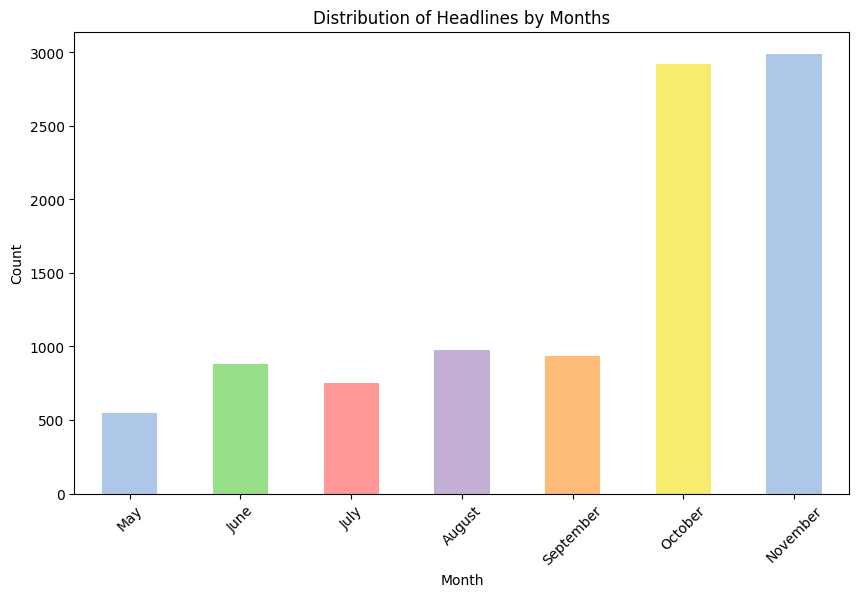

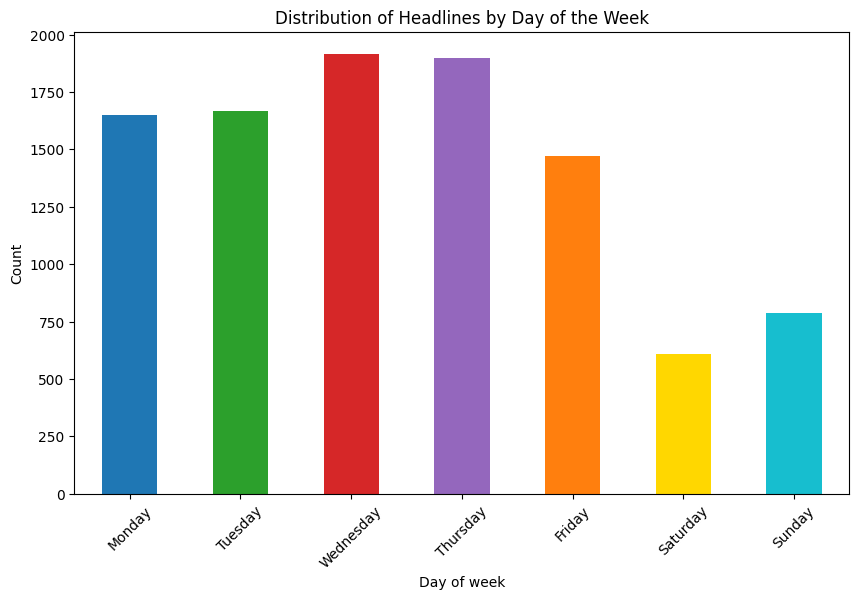

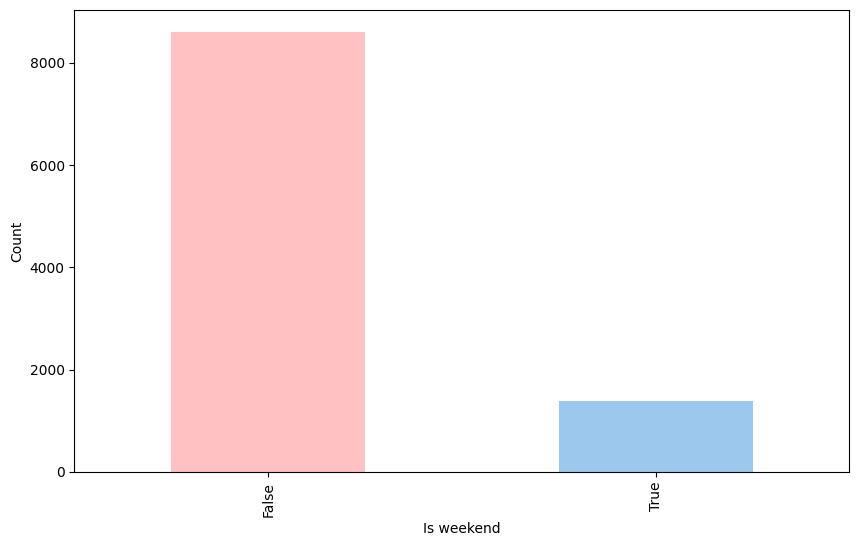

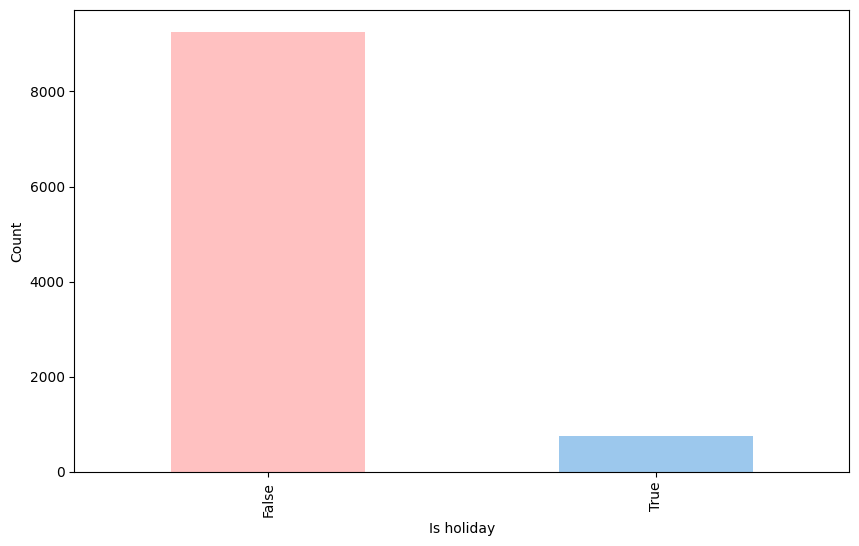

/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Use

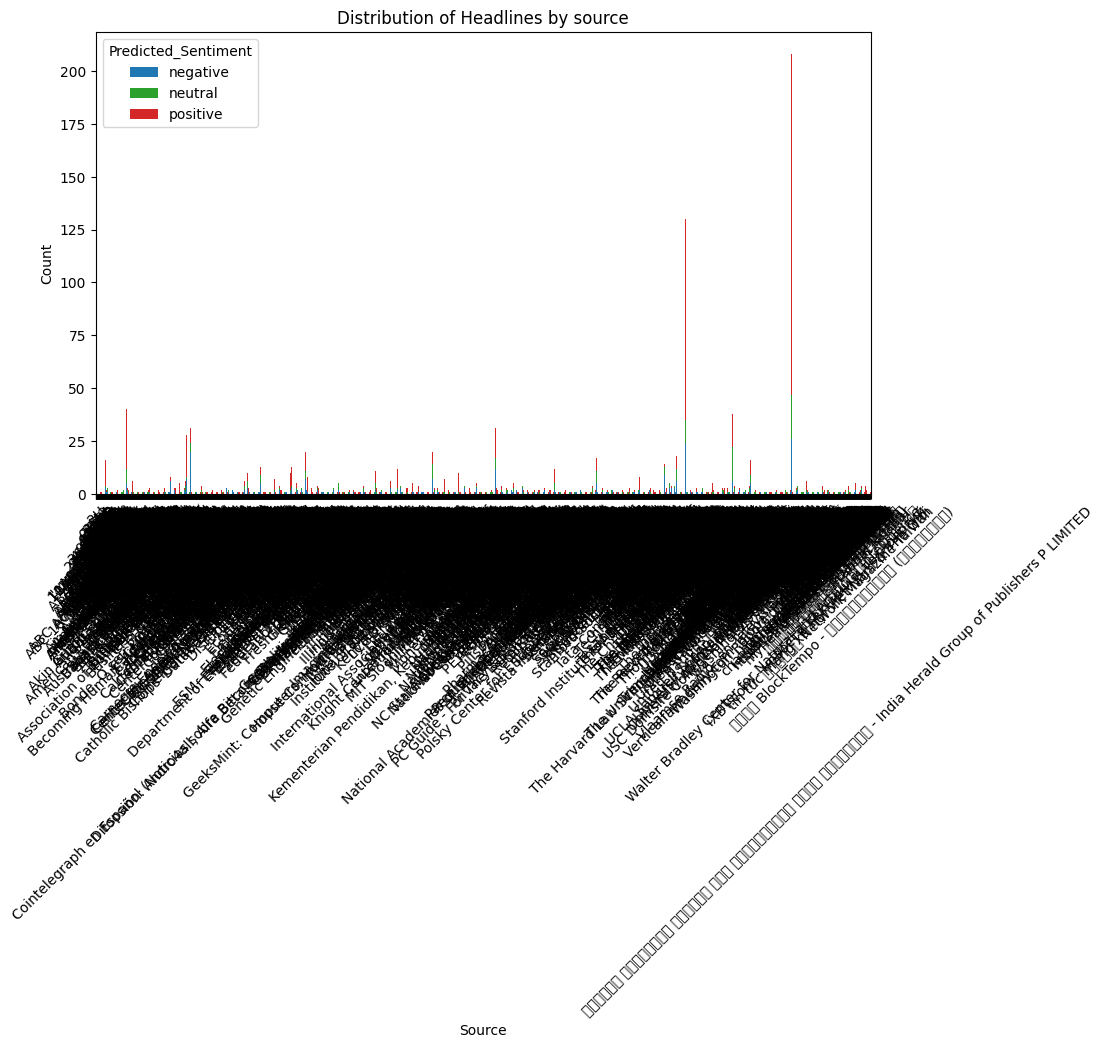

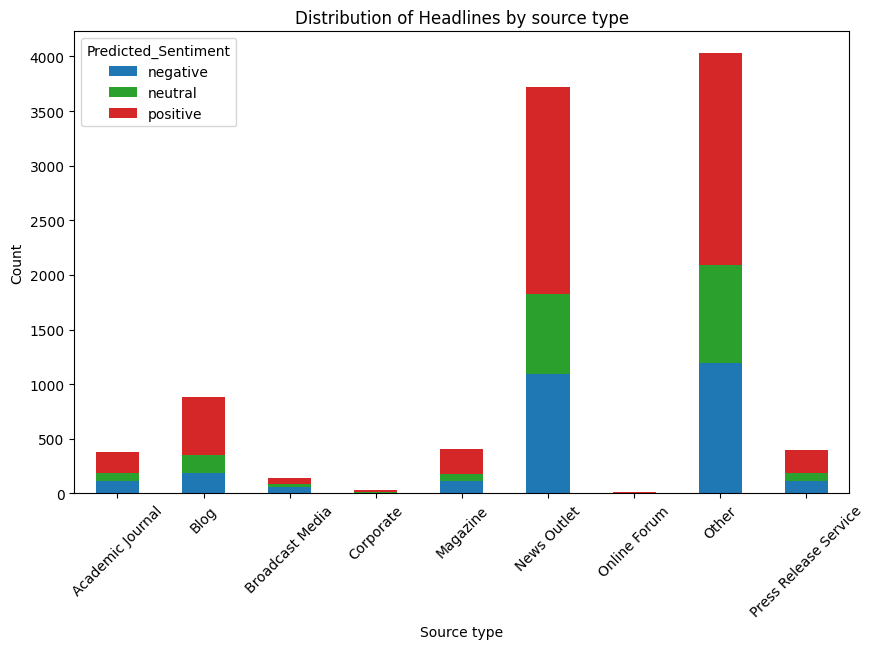

In [5]:

import calendar
# columns_of_interest = ['source', 'country', 'language', "month","day_of_week", "is_weekend", "is_holiday", "source_type", "top_level_domain"]
columns_of_interest = ['month', "day_of_week", "is_weekend", "is_holiday", "source", "source_type"]
csfont = {'fontname':'sans'}
hfont = {'fontname':'sans'}
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
contrast_colors = [
    "#1F77B4",  # Dark Blue
    "#2CA02C",  # Dark Green
    "#D62728",  # Dark Red
    "#9467BD",  # Dark Purple
    "#FF7F0E",  # Dark Orange
    "#FFD700",  # Dark Yellow
    "#17BECF",  # Dark Cyan
    "#E377C2",  # Dark Magenta
    "#AEC7E8",  # Light Blue
    "#98DF8A",  # Light Green
    "#FF9896",  # Light Red
    "#C5B0D5",  # Light Purple
    "#FFBB78",  # Light Orange
    "#F7EC6F"   # Light Yellow
]


pastel_colors = ["#FFC1C1", "#9CC8ED", "#AAE2C3"]

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for col in columns_of_interest:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if col == 'day_of_week':
        ax.set_title('Distribution of Headlines by Day of the Week', **csfont)
        df[col].value_counts().reindex(day_order).plot(kind='bar', color=contrast_colors[0:7], ax=ax)
        plt.xticks(rotation=45)
    elif col == 'month':
        ax.set_title('Distribution of Headlines by Months', **csfont)
        df[col].value_counts().sort_index().plot(kind='bar', color=contrast_colors[8:14], ax=ax)
        plt.xticks(range(7), calendar.month_name[5:12], rotation=45)  # Set x-axis labels as month names
    elif col == 'source' or col == 'source_type':
        ax.set_title('Distribution of Headlines by ' + col.replace("_", " "), **csfont)
        # plt.xticks(rotation=90)
        df.groupby([col, 'Predicted_Sentiment'])[col].count().unstack().plot(kind='bar', stacked=True, color=contrast_colors, ax=ax)
        plt.xticks(rotation=45)
    else:
        df[col].value_counts().plot(kind='bar', color=pastel_colors, ax=ax)

    ax.set_xlabel(col.replace("_", " ").capitalize(), **hfont)
    ax.set_ylabel('Count', **hfont)

    plt.show()


# for col in columns_of_interest:
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     if col == 'day_of_week':
#         ax.set_title('Distribution of Headline by Day of the Week', **csfont)
#         plt.xticks(rotation=90)
#         df.groupby([col, 'Predicted_Sentiment'])[col].count().unstack().reindex(day_order).plot(kind='bar', stacked=True, color=pastel_colors, ax=ax)
#     elif col == 'month':
#         ax.set_title('Distribution of Headline by Months', **csfont)
#         df.groupby([col, 'Predicted_Sentiment'])[col].count().unstack().sort_index().plot(kind='bar', stacked=True, color=pastel_colors, ax=ax)
#         plt.xticks(range(7), calendar.month_name[5:12], rotation=45)  # Set x-axis labels as month names
#     else:
#         df.groupby([col, 'Predicted_Sentiment'])[col].count().unstack().plot(kind='bar', stacked=True, color=pastel_colors, ax=ax)

#     ax.set_xlabel(col, **hfont)
#     ax.set_ylabel('Count', **hfont)
#     plt.show()


## Looking at Source 

/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


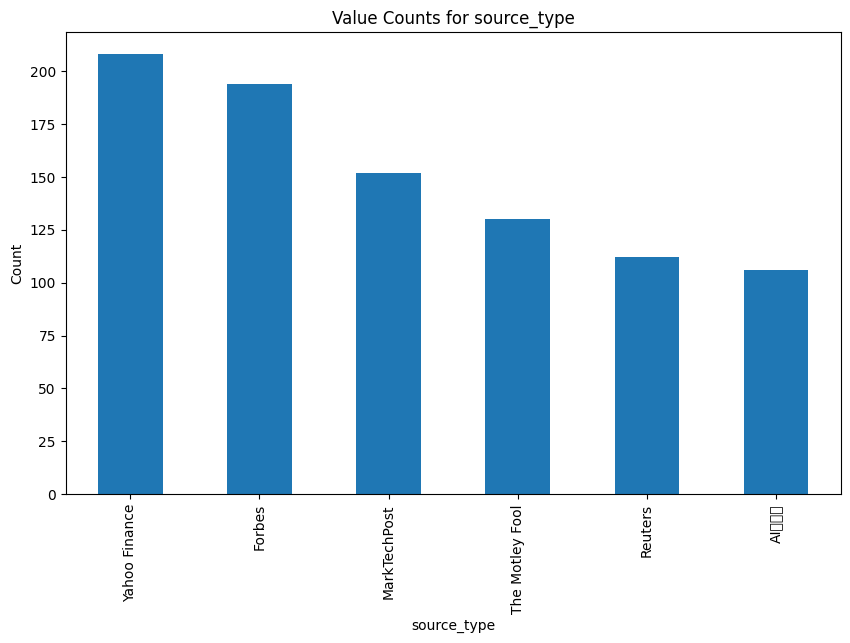

In [6]:
plt.figure(figsize=(10, 6))
filtered_values = df["source"].value_counts()[df["source"].value_counts() > 100]
filtered_values.plot(kind='bar')
plt.title('Value Counts for ' + col, **csfont)
plt.xlabel(col, **hfont)
plt.ylabel('Count', **hfont)
plt.show()